In [1]:
import os
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import FigureCanvasPdf, PdfPages
from matplotlib.figure import Figure
import numpy as np

In [2]:
#os.listdir()

In [4]:
#os.chdir("drive/My Drive/Studio-Lab-Healthcare-Ellinger/kmeans")

In [5]:
r = requests.get("https://github.com/AhmadzadehSanaz/Studio-Lab-Healthcare-Ellinger/raw/main/Data%20Pipeline/hexagon_collection_master.geojson")

In [6]:
data = r.json()

In [7]:
# with open("datafilename.geojson") as jsonFile:
# data = json.loads(jsonFile.read()

In [8]:
features = [f["properties"] for f in data["features"]]

In [9]:
df = pd.DataFrame.from_records(features)

In [10]:
df.head()

,fid,id,top,right,bottom,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,...,nearest_hospital_name,nearest_hospital_distance,nearest_cta_rail_station_name,nearest_cta_rail_station_distance,nearest_bus_station_name,nearest_bus_station_distance,nearest_bike_station_name,nearest_bike_station_distance,bike_station_count,predominant_race_by_population_per_cell
0,1,6274,1.913898e+06,1.162049e+06,1.911258e+06,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,...,St. Elizabeth's Hospital,0.569742,Western/Milwaukee,0.090404,Milwaukee & Oakley/Moffat,0.054090,Western Ave & Winnebago Ave,0.072335,2.0,Hispanic or Latino
1,2,6275,1.911258e+06,1.162049e+06,1.908618e+06,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,...,St. Elizabeth's Hospital,0.071033,Damen/Milwaukee,0.435950,Western & Le Moyne,0.067718,Claremont Ave & Hirsch St,0.054763,3.0,Hispanic or Latino
2,3,6272,1.919178e+06,1.162049e+06,1.916538e+06,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,...,St. Elizabeth's Hospital,1.569618,California/Milwaukee,0.822329,Western & Schubert,0.112082,Logan Blvd & Elston Ave,0.091337,1.0,Hispanic or Latino
3,4,6273,1.916538e+06,1.162049e+06,1.913898e+06,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,...,St. Elizabeth's Hospital,1.069653,Western/Milwaukee,0.484871,Western & Belden,0.097150,Campbell Ave & Fullerton Ave,0.219662,1.0,Hispanic or Latino
4,5,6278,1.903338e+06,1.162049e+06,1.900698e+06,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,...,Saint Mary Of Nazareth Hospital,1.092766,California-Lake,0.559566,Western & Fulton,0.028106,Artesian Ave & Hubbard St,0.216887,1.0,Hispanic or Latino


In [11]:
df.columns

Index(['fid', 'id', 'top', 'right', 'bottom', 'adult_obesity',
       'total_population', 'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_name', 'nearest_park_distance',
       'nearest_hospital_name', 'nearest_hospital_distance',
       'nearest_cta_rail_station_name', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_name', 'nearest_bus_station_distance',
       'nearest_bike_station_name', 'nearest_bike_station_distance',
       'bike_station_count',

In [12]:
exclude = ['fid', 'id', 'top', 'right', 'bottom',"predominant_race_by_population_per_cell"]

In [13]:
withName = [i for i in df.columns if "name" in i]

In [14]:
exclude = exclude + withName

In [15]:
exclude

['fid',
 'id',
 'top',
 'right',
 'bottom',
 'predominant_race_by_population_per_cell',
 'nearest_park_name',
 'nearest_hospital_name',
 'nearest_cta_rail_station_name',
 'nearest_bus_station_name',
 'nearest_bike_station_name']

In [16]:
race = pd.get_dummies(df["predominant_race_by_population_per_cell"])

In [17]:
race

,Hispanic or Latino,Non-Hispanic African American or Black,Non-Hispanic Asian or Pacific Islander
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1233,0,1,0
1234,0,1,0
1235,0,1,0
1236,0,1,0


In [18]:
df["predominant_race_by_population_per_cell"].unique()

array(['Hispanic or Latino', 'Non-Hispanic African American or Black',
       'Non-Hispanic Asian or Pacific Islander'], dtype=object)

In [19]:
X = df.drop(exclude,axis=1)

In [20]:
X.head()

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,diabetes_population_number,air_quality_index_number,air_quality_PM10_number\t,air_quality_PM25_number,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count
0,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,41541.500000,2,10409.000000,73183.000000,0,...,5600.000000,33.310000,22.205000,8.800000,0.107567,0.569742,0.090404,0.054090,0.072335,2.0
1,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,49729.000000,2,9424.000000,79013.000000,1,...,4700.000000,32.340000,22.360000,8.790000,0.175790,0.071033,0.435950,0.067718,0.054763,3.0
2,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,31349.750000,1,6492.250000,80099.250000,0,...,4275.000000,33.925000,21.720000,8.800000,0.223092,1.569618,0.822329,0.112082,0.091337,1.0
3,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,33354.000000,2,11394.000000,67353.000000,0,...,6500.000000,34.280000,22.050000,8.810000,0.002885,1.069653,0.484871,0.097150,0.219662,1.0
4,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,25626.333333,2,5573.666667,54067.333333,0,...,3266.666667,32.026667,22.696667,8.766667,0.233405,1.092766,0.559566,0.028106,0.216887,1.0


In [21]:
min_max_scaler = MinMaxScaler()

In [22]:
X[X.columns] = min_max_scaler.fit_transform(X)

In [23]:
X

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,diabetes_population_number,air_quality_index_number,air_quality_PM10_number\t,air_quality_PM25_number,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count
0,0.308791,0.786628,0.446812,0.062502,0.169281,0.526560,0.4,0.532468,0.624494,0.000000,...,0.636364,0.378731,0.891409,0.268966,0.018361,0.088000,0.011157,0.009420,0.005863,0.2
1,0.292308,0.838293,0.356264,0.081318,0.202692,0.630433,0.4,0.479607,0.686446,0.333333,...,0.534091,0.318408,0.897631,0.262069,0.030327,0.004531,0.057436,0.011970,0.004200,0.3
2,0.351099,0.516217,0.262389,0.024774,0.142359,0.397259,0.2,0.322274,0.697989,0.000000,...,0.485795,0.416978,0.871939,0.268966,0.038624,0.255351,0.109183,0.020268,0.007661,0.1
3,0.325275,0.734963,0.537361,0.043687,0.135869,0.422687,0.4,0.585328,0.562542,0.000000,...,0.738636,0.439055,0.885187,0.275862,0.000000,0.171671,0.063988,0.017475,0.019806,0.1
4,0.242491,0.537203,0.154160,0.180209,0.275044,0.324647,0.4,0.272978,0.421363,0.000000,...,0.371212,0.298922,0.911147,0.245977,0.040433,0.175539,0.073991,0.004560,0.019543,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0.278022,0.077214,0.068243,0.061968,0.000030,0.030524,0.0,0.056805,0.344403,0.000000,...,0.261364,0.276741,0.958852,0.072414,0.058770,0.700794,0.742663,0.038307,0.022058,0.1
1234,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.250000,0.484453,0.922521,0.172414,0.056197,0.293321,0.564637,0.098403,0.135421,0.0
1235,0.147253,0.255787,0.037297,0.201083,0.006610,0.122453,0.0,0.101374,0.474066,0.000000,...,0.250000,0.484453,0.922521,0.172414,0.102028,0.214446,0.609258,0.074673,0.173136,0.0
1236,0.139560,0.213399,0.027647,0.144316,0.005979,0.137386,0.0,0.060266,0.654769,0.000000,...,0.198864,0.464863,0.924328,0.151724,0.040772,0.253402,0.490846,0.086028,0.091853,0.0


In [24]:
X[race.columns] = race

In [25]:
X.describe()

,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,non_hispanic_white_population_number_mean,park_count,population_no_health_insurance,median_household_income,hospital_count,...,air_quality_PM25_number,nearest_park_distance,nearest_hospital_distance,nearest_cta_rail_station_distance,nearest_bus_station_distance,nearest_bike_station_distance,bike_station_count,Hispanic or Latino,Non-Hispanic African American or Black,Non-Hispanic Asian or Pacific Islander
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,0.339674,0.360842,0.171063,0.156092,0.121419,0.162810,0.099515,0.275763,0.381031,0.011847,...,0.261890,0.096309,0.267530,0.227245,0.067782,0.140076,0.052181,0.476575,0.449111,0.074313
std,0.198895,0.233087,0.194681,0.204044,0.179043,0.190317,0.149534,0.226502,0.220393,0.068629,...,0.231289,0.147768,0.184220,0.203626,0.145820,0.204069,0.101759,0.499653,0.497605,0.262386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.180660,0.032544,0.010133,0.006550,0.022635,0.000000,0.111678,0.201373,0.000000,...,0.131034,0.035055,0.131918,0.071934,0.012818,0.019552,0.000000,0.000000,0.000000,0.000000
50%,0.318681,0.309424,0.073482,0.086501,0.030527,0.079984,0.000000,0.200789,0.315222,0.000000,...,0.213793,0.057982,0.223227,0.159226,0.024053,0.044902,0.000000,0.000000,0.000000,0.000000
75%,0.457143,0.494926,0.259237,0.232193,0.140887,0.215748,0.200000,0.383815,0.491068,0.000000,...,0.268966,0.088017,0.360979,0.318360,0.048331,0.168677,0.100000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=5)

In [28]:
kmeans = kmeans.fit(X)

In [29]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3])

In [30]:
X["cluster"] = kmeans.labels_

In [31]:
df["cluster"] = kmeans.labels_

In [32]:
df.head()

,fid,id,top,right,bottom,adult_obesity,total_population,hispanic_or_latino_population_number_mean,non_hispanic_african_american_or_black_population_number_mean,non_hispanic_asian_or_pacific_islander_population_number_mean,...,nearest_hospital_distance,nearest_cta_rail_station_name,nearest_cta_rail_station_distance,nearest_bus_station_name,nearest_bus_station_distance,nearest_bike_station_name,nearest_bike_station_distance,bike_station_count,predominant_race_by_population_per_cell,cluster
0,1,6274,1.913898e+06,1.162049e+06,1.911258e+06,140500.000000,79532.000000,28172.500000,5053.500000,2817.0,...,0.569742,Western/Milwaukee,0.090404,Milwaukee & Oakley/Moffat,0.054090,Western Ave & Winnebago Ave,0.072335,2.0,Hispanic or Latino,2
1,2,6275,1.911258e+06,1.162049e+06,1.908618e+06,133000.000000,84458.000000,22477.000000,6551.000000,3373.0,...,0.071033,Damen/Milwaukee,0.435950,Western & Le Moyne,0.067718,Claremont Ave & Hirsch St,0.054763,3.0,Hispanic or Latino,2
2,3,6272,1.919178e+06,1.162049e+06,1.916538e+06,159750.000000,53749.750000,16572.250000,2050.750000,2369.0,...,1.569618,California/Milwaukee,0.822329,Western & Schubert,0.112082,Logan Blvd & Elston Ave,0.091337,1.0,Hispanic or Latino,2
3,4,6273,1.916538e+06,1.162049e+06,1.913898e+06,148000.000000,74606.000000,33868.000000,3556.000000,2261.0,...,1.069653,Western/Milwaukee,0.484871,Western & Belden,0.097150,Campbell Ave & Fullerton Ave,0.219662,1.0,Hispanic or Latino,2
4,5,6278,1.903338e+06,1.162049e+06,1.900698e+06,110333.333333,55750.666667,9764.666667,14421.666667,4577.0,...,1.092766,California-Lake,0.559566,Western & Fulton,0.028106,Artesian Ave & Hubbard St,0.216887,1.0,Hispanic or Latino,2


In [33]:
def clusterCity(X,features=None,n_clusters=5):
  min_max_scaler = MinMaxScaler()
  X[X.columns] = min_max_scaler.fit_transform(X)
  if features:
    X = X[features]
  kmeans = KMeans(n_clusters=n_clusters,random_state=23)
  kmeans = kmeans.fit(X)
  return kmeans.labels_

In [34]:
X.columns

Index(['adult_obesity', 'total_population',
       'hispanic_or_latino_population_number_mean',
       'non_hispanic_african_american_or_black_population_number_mean',
       'non_hispanic_asian_or_pacific_islander_population_number_mean',
       'non_hispanic_white_population_number_mean', 'park_count',
       'population_no_health_insurance', 'median_household_income',
       'hospital_count', 'cta_rail_station_count', 'cta_bus_station_count',
       'asthma_population_number', 'diabetes_population_number',
       'air_quality_index_number', 'air_quality_PM10_number\t',
       'air_quality_PM25_number', 'nearest_park_distance',
       'nearest_hospital_distance', 'nearest_cta_rail_station_distance',
       'nearest_bus_station_distance', 'nearest_bike_station_distance',
       'bike_station_count', 'Hispanic or Latino',
       'Non-Hispanic African American or Black',
       'Non-Hispanic Asian or Pacific Islander', 'cluster'],
      dtype='object')

adult_obesity


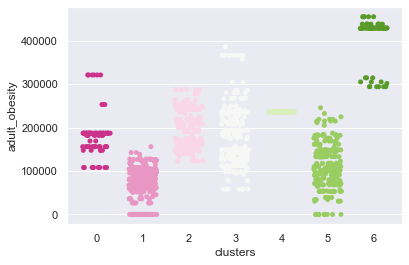

population_no_health_insurance


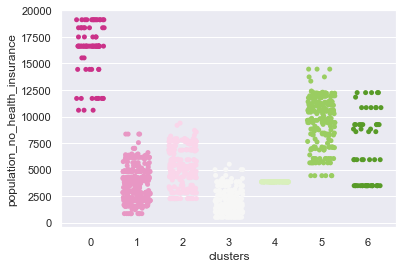

diabetes_population_number


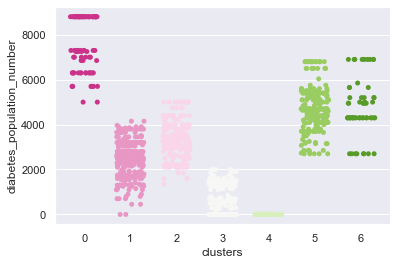

nearest_park_distance


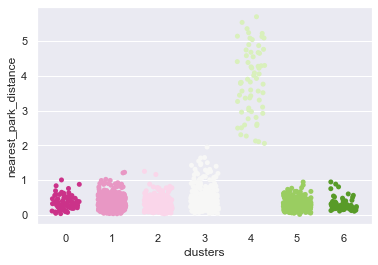

hospital_count


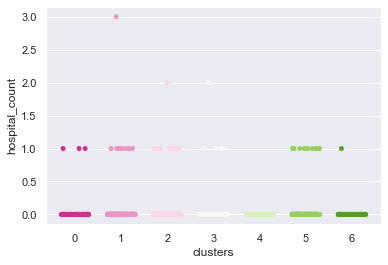

In [35]:
#https://www.geeksforgeeks.org/seaborn-categorical-plots/
cluster_features = ["adult_obesity", "population_no_health_insurance", "diabetes_population_number", "nearest_park_distance", "hospital_count"]
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster1.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.stripplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG", jitter=0.3)
  
 # https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/
 # https://futurestud.io/tutorials/matplotlib-save-plots-as-file
 # plt.xlabel('x values')
 # plt.ylabel('y values')
 # plt.title('plotted x and y values')
 # plt.legend(['line 1'])
  
  plt.plot()
  #plt.savefig('fig.pdf')               
  plt.show()      

total_population


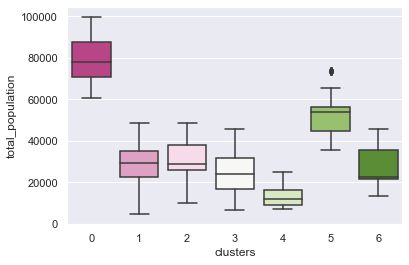

air_quality_index_number


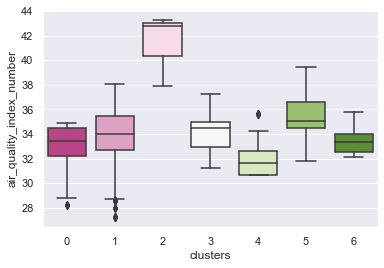

nearest_hospital_distance


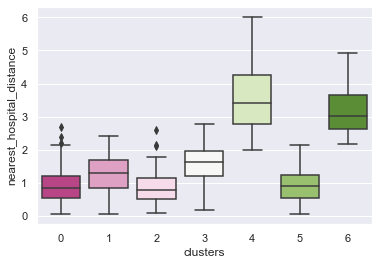

nearest_cta_rail_station_distance


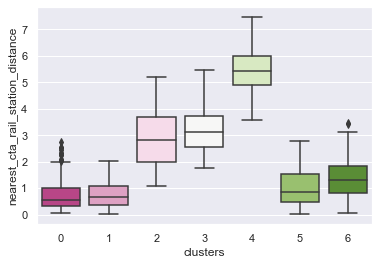

In [36]:
cluster_features = ["total_population","air_quality_index_number","nearest_hospital_distance","nearest_cta_rail_station_distance"]
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster2.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.boxplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG")
  plt.show()

total_population


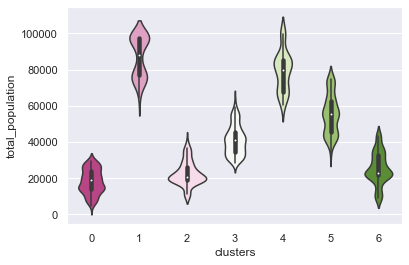

median_household_income


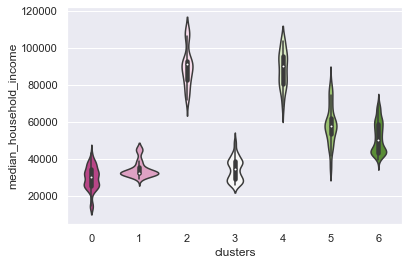

non_hispanic_white_population_number_mean


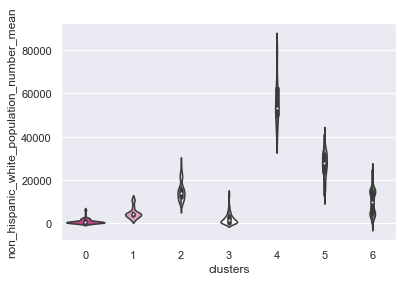

In [37]:
cluster_features = ["total_population","median_household_income", "non_hispanic_white_population_number_mean"] 
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster3.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.violinplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG")
    
  plt.show()

total_population


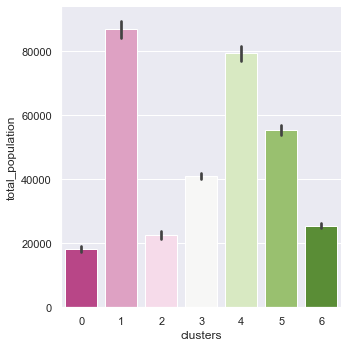

median_household_income


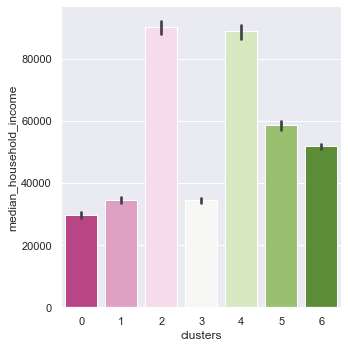

non_hispanic_white_population_number_mean


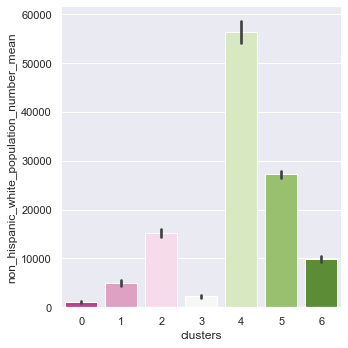

In [38]:
cluster_features = ["total_population","median_household_income", "non_hispanic_white_population_number_mean"] 
n_clusters = 7
clusters = clusterCity(X,cluster_features,n_clusters)
df["clusters"] = clusters

for i,f in enumerate(data["features"]):
  f["properties"]["cluster"] = int(clusters[i])

with open("geojsonWCluster4.geojson","w") as jsonFile:
  jsonFile.write(json.dumps(data))

df_features_clusters = df[cluster_features+["clusters"]]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for f in cluster_features: 
  print(f)
  sns.catplot(x="clusters", y=f, data=df_features_clusters, palette="PiYG", kind ='bar')
    
  plt.show()